In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)

170498071/170498071 [==============================] - 15s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


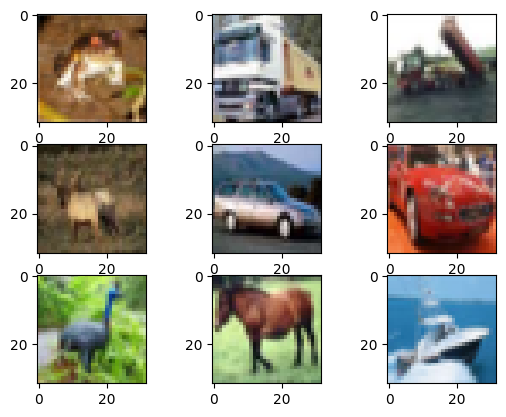

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for temp in range(9):
    plt.subplot(3,3,temp+1)
    plt.imshow(X_train[temp])

In [ ]:
#이미지 전처리 scale
x_mean  = np.mean(X_train,axis=(0,1,2))
x_mean

array([125.30691805, 122.95039414, 113.86538318])

In [ ]:
x_std = np.std(X_train,axis=(0,1,2))
x_std

array([62.99321928, 62.08870764, 66.70489964])

In [ ]:
X_train = (X_train-x_mean) / x_std
X_test = (X_test-x_mean) / x_std

In [ ]:
X_train[0]

array([[[-1.05260405e+00, -9.81666336e-01, -7.62543433e-01],
        [-1.30659965e+00, -1.23936215e+00, -1.03238868e+00],
        [-1.19547658e+00, -1.20715017e+00, -1.06237148e+00],
        ...,
        [ 5.18993668e-01,  1.45752846e-01, -8.79303202e-02],
        [ 4.23745321e-01,  3.30109280e-02, -1.77878735e-01],
        [ 3.60246424e-01,  1.69049397e-02, -1.62887333e-01]],

       [[-1.73521721e+00, -1.65811785e+00, -1.40717374e+00],
        [-1.98921280e+00, -1.98023761e+00, -1.70700179e+00],
        [-1.70346776e+00, -1.85138971e+00, -1.70700179e+00],
        ...,
        [-3.66216884e-02, -5.62910640e-01, -8.82474653e-01],
        [-1.00120586e-01, -6.43440581e-01, -9.57431666e-01],
        [-5.24964129e-02, -5.79016628e-01, -8.52491848e-01]],

       [[-1.59234469e+00, -1.59369389e+00, -1.39218234e+00],
        [-1.73521721e+00, -1.86749569e+00, -1.70700179e+00],
        [-1.21135130e+00, -1.54537593e+00, -1.58707057e+00],
        ...,
        [-1.15995311e-01, -6.27334593e-01,

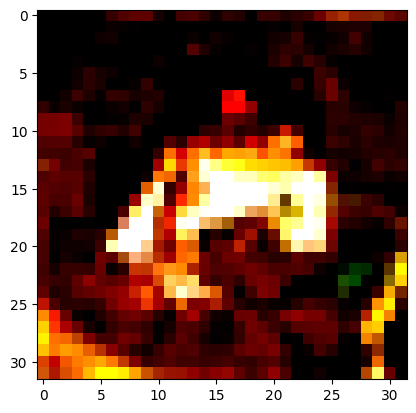

In [ ]:
plt.imshow(X_train[0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=100)

In [ ]:
X_val.shape

(15000, 32, 32, 3)

In [ ]:
y_val.shape

(15000, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


model.compile(optimizer=Adam(5e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 23s 8ms/step - loss: 1.7264 - acc: 0.3768 - val_loss: 1.4700 - val_acc: 0.4724
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.3855 - acc: 0.5031 - val_loss: 1.3116 - val_acc: 0.5315
Epoch 3/30
1094/1094 [==============================] - 8s 8ms/step - loss: 1.2492 - acc: 0.5580 - val_loss: 1.2038 - val_acc: 0.5805
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1444 - acc: 0.6013 - val_loss: 1.1134 - val_acc: 0.6086
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0623 - acc: 0.6310 - val_loss: 1.1091 - val_acc: 0.6143
Epoch 6/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.9879 - acc: 0.6577 - val_loss: 1.0440 - val_acc: 0.6354
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9328 - acc: 0.6770 - val_loss: 0.9716 - val_acc: 0.6599
Epoch 8/30
1094/1094 [==============================] - 8s 7m

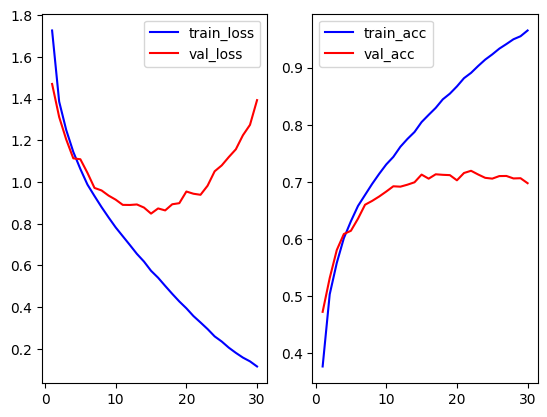

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.subplot(1,2,1)
plt.plot(range(1,len(train_loss)+1),train_loss,color='blue',label='train_loss')
plt.plot(range(1,len(train_loss)+1),val_loss,color='red',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(train_loss)+1),train_acc,color='blue',label='train_acc')
plt.plot(range(1,len(train_loss)+1),val_acc,color='red',label='val_acc')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4277 - acc: 0.6944


[1.427706003189087, 0.6944000124931335]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

model_d = Sequential()
model_d.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model_d.add(Conv2D(32,3,padding='same',activation='relu'))
model_d.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model_d.add(Dropout(0.3))
model_d.add(Conv2D(64,3,padding='same',activation='relu'))
model_d.add(Conv2D(64,3,padding='same',activation='relu'))
model_d.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model_d.add(Dropout(0.3))
model_d.add(Conv2D(128,3,padding='same',activation='relu'))
model_d.add(Conv2D(128,3,padding='same',activation='relu'))
model_d.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model_d.add(Dropout(0.3))
model_d.add(Flatten())
model_d.add(Dense(256,activation='relu'))
model_d.add(Dense(10,activation='softmax'))


model_d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
model_d.compile(optimizer=Adam(1e-6),loss='sparse_categorical_crossentropy',metrics=['acc'])
history0_d = model_d.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val),callbacks=[es])

Epoch 1/50
274/274 [==============================] - 10s 21ms/step - loss: 2.3058 - acc: 0.0997 - val_loss: 2.3009 - val_acc: 0.1085
Epoch 2/50
274/274 [==============================] - 4s 16ms/step - loss: 2.3020 - acc: 0.1035 - val_loss: 2.2978 - val_acc: 0.1157
Epoch 3/50
274/274 [==============================] - 5s 17ms/step - loss: 2.2975 - acc: 0.1097 - val_loss: 2.2947 - val_acc: 0.1233
Epoch 4/50
274/274 [==============================] - 5s 17ms/step - loss: 2.2942 - acc: 0.1129 - val_loss: 2.2916 - val_acc: 0.1349
Epoch 5/50
274/274 [==============================] - 4s 16ms/step - loss: 2.2897 - acc: 0.1201 - val_loss: 2.2878 - val_acc: 0.1485
Epoch 6/50
274/274 [==============================] - 5s 18ms/step - loss: 2.2854 - acc: 0.1241 - val_loss: 2.2834 - val_acc: 0.1603
Epoch 7/50
274/274 [==============================] - 4s 16ms/step - loss: 2.2798 - acc: 0.1315 - val_loss: 2.2779 - val_acc: 0.1717
Epoch 8/50
274/274 [==============================] - 5s 17ms/step -

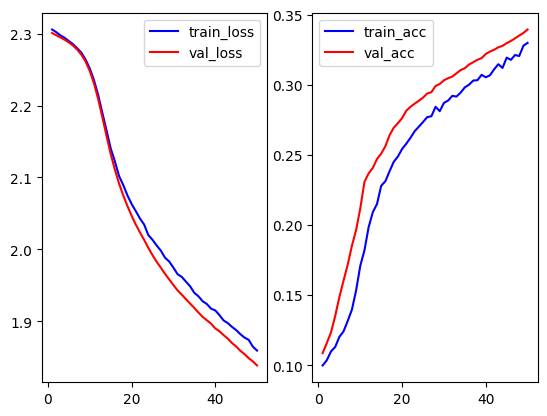

In [ ]:
train_loss = history0_d.history['loss']
val_loss = history0_d.history['val_loss']
train_acc = history0_d.history['acc']
val_acc = history0_d.history['val_acc']

plt.subplot(1,2,1)
plt.plot(range(1,len(train_loss)+1),train_loss,color='blue',label='train_loss')
plt.plot(range(1,len(train_loss)+1),val_loss,color='red',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(train_loss)+1),train_acc,color='blue',label='train_acc')
plt.plot(range(1,len(train_loss)+1),val_acc,color='red',label='val_acc')
plt.legend()
plt.show()

In [ ]:
model_d.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8249 - acc: 0.3449


[1.8249077796936035, 0.3449000120162964]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
model.layers

In [ ]:
layers.output

NameError: ignored

In [ ]:
import tensorflow as tf

get_output = []

for layer in model.layers:
    get_output.append(layer.output)

In [ ]:
# acc 상승
# dropout 적용
# learing rate 상승

# 모델 저장

In [ ]:
### 1. 모델 자체를 저장
### 2. 가중치만 저장 (일반적인 방법, 경량화)

In [ ]:
# 모델 자체 저장

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/test.h5')

In [ ]:
load_model = tf.keras.models.load_model('/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/test.h5')

In [ ]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
# 2. 가중치만 저장

In [ ]:
model.save_weights('/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/test_weights')

In [ ]:
model.load_weights('/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/test_weights')

In [ ]:
# CNN 모델 : VGG, ResNet

# Or 전이학습 (나의 데이터와 전이학습한 모델의 데이터가 흡사할 때) == Fine Tunning
# 기본적인 Fine Tunning : 전이 학습 모델의 클래스가10개이고 나는 3개를 분류하고 싶을 때 클래스만 줄이는 것이 대표적

# VGG 전이학습 모델로 cifar10 분류

In [ ]:
# VGG16, VGG19를 많이 사용함